# Preprocessing

## Time Range:
ALL: 1970 - 2000

    Train: 1970 - 1988

    Dev:   1988 - 1994

    Test:  1994 - 2000

In [275]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression

import calendar
import matplotlib.dates as dt
import time, datetime, calendar

from datetime import date
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

def Plot1(date,data1,x_ticks=1,title="",xlable="",ylable="",llable="",\
         save_path=False,figure_size=[18,6]):
    """
    Plot for time series
    """
    year = dt.YearLocator()
    yearformat = dt.DateFormatter('%Y')
    fig=plt.figure(figsize=figure_size)
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis.set_major_locator(year)
    ax.plot_date(pd.to_datetime(date),data1,'-',\
                 linewidth = 2.5,label=llable, alpha=1)
    
    #ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
    ax.xaxis.set_major_formatter(yearformat)
    if(not llable==''):
        ax.legend(fontsize=20)
    ax.set_title(title,fontsize=26)
    plt.xlabel(xlable,fontsize=20)
    plt.ylabel(ylable,fontsize=20)
    plt.xticks(date[::x_ticks],fontsize=16)
    plt.yticks(fontsize=16)

## Y: Price and excess return

In [276]:
# calculate the excess return for n period bond and average bond excess returns
df_er = pd.read_csv("../Data/RFS.csv").iloc[:,[0,-4,-3,-2,-1]]
df_er['yr_ave'] = df_er.iloc[:,1:].mean(axis=1)

In [277]:
# calculate the price of n period bond 
df_price =  pd.read_csv("../Data/Fama_Bliss_price.csv")
df_price = df_price.iloc[::3,:]
df_er = df_er.iloc[::3,:]

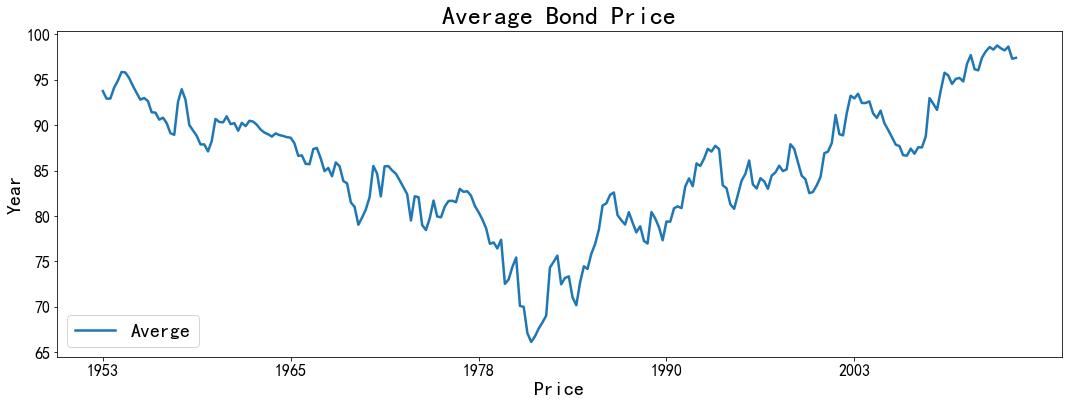

In [278]:
Plot1(df_price.iloc[:,0],df_price.iloc[:,1:].mean(axis=1),50,"Average Bond Price","Price","Year","Averge")

In [279]:
df_price = df_price.iloc[67:-56,:]
df_er = df_er.iloc[23:-16,:]

In [280]:
df_price.index = df_price["Date"]
df_er.index = df_er["Date"]
df_er.drop(["Date"],axis=1,inplace=True)
df_price.drop(["Date"],axis=1,inplace=True)

In [281]:
df_er.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1969-10-01 to 1999-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr2     121 non-null    float64
 1   yr3     121 non-null    float64
 2   yr4     121 non-null    float64
 3   yr5     121 non-null    float64
 4   yr_ave  121 non-null    float64
dtypes: float64(5)
memory usage: 5.7+ KB


In [282]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1969-10-31 to 1999-10-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price1  121 non-null    float64
 1   Price2  121 non-null    float64
 2   Price3  121 non-null    float64
 3   Price4  121 non-null    float64
 4   Price5  121 non-null    float64
dtypes: float64(5)
memory usage: 5.7+ KB


## X: Factors

In [283]:
# input factors
df_1 = pd.read_csv("../Data/RFS.csv",index_col=0).iloc[:,:-4]
df_2 = pd.read_csv("../Data/Finan_Raw.csv",index_col=0)
df_3 = pd.read_csv("../Data/Macro_Raw.csv",index_col=0)
df_4 = pd.read_csv("../Data/Finan_Uncertainty.csv",index_col=0).iloc[:,:1]
df_4.columns = ['Finan_h1']
df_5 = pd.read_csv("../Data/Marco_Uncertainty.csv",index_col=0).iloc[:,:1]
df_5.columns = ['Marco_h1']

In [284]:
df_factor = pd.concat([df_1,df_2,df_3,df_4,df_5],axis=1,sort=True)
df_factor = df_factor.iloc[::3,:]
df_factor = df_factor.iloc[39:-82,:]

In [285]:
df_sent = pd.read_csv("../Data/Investor_Sentiment.csv",index_col=0).iloc[:,:2]
df_sent = df_sent.iloc[::3,:]
df_sent = df_sent[47:-76:]

In [286]:
df_factor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1969-10-01 to 1999-10-01
Columns: 292 entries, CP to Marco_h1
dtypes: float64(292)
memory usage: 277.0+ KB


In [287]:
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1969-10-01 to 1999-10-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SENT^   121 non-null    float64
 1   SENT    121 non-null    float64
dtypes: float64(2)
memory usage: 2.8+ KB


In [288]:
df_factor

,CP,f1,f2,f3,f4,f5,f6,f7,f8,F5,...,PCE defl,PCE defl: dlbes,PCE defl: nondble,PCE defl: service,AHE: goods,AHE: const,AHE: mfg,Consumer expect,Finan_h1,Marco_h1
1969-10-01,0.367050,-0.051196,1.476900,-0.026923,0.626370,0.914460,-0.201820,-0.159670,-0.33979,0.4675,...,23.6183,56.4323,27.4817,18.1335,3.36,4.42,3.13,81.9,1.061379,0.619674
1970-01-01,0.868230,-1.980500,1.838300,-0.105640,0.326570,-0.760690,0.058369,-1.140400,-0.66347,2.6821,...,23.9104,56.5333,27.9188,18.3809,3.41,4.54,3.16,77.1,1.101297,0.666907
1970-04-01,2.197700,-1.318200,1.165700,-0.336560,-0.844700,0.215540,-0.114040,0.323720,0.64264,3.8764,...,24.1896,56.7748,28.2254,18.6378,3.47,4.66,3.19,72.7,1.232648,0.668466
1970-07-01,3.168100,-0.241360,-0.122540,-0.044479,0.251390,0.247760,0.199670,-0.219920,0.14265,1.3715,...,24.4185,57.1150,28.3993,18.8747,3.53,4.76,3.25,74.2,1.111998,0.650692
1970-10-01,1.387200,-2.364100,0.093430,-0.778700,0.799410,-2.759800,-1.053100,-0.986900,-1.20700,1.8342,...,24.7121,57.8173,28.6705,19.1315,3.57,4.86,3.26,72.8,1.039108,0.703398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-10-01,-2.274300,0.115650,-0.441590,-1.446000,0.109440,0.939130,-1.158000,0.355640,1.42370,1.5735,...,89.2309,118.7205,87.2669,84.8217,14.34,16.39,13.52,87.5,1.100911,0.617612
1999-01-01,-0.093647,0.243840,-0.551140,-0.391210,-0.248620,-0.222080,-0.909130,-0.088909,-0.95630,-0.0780,...,89.5420,117.7977,87.7491,85.2595,14.43,16.48,13.59,95.7,1.014397,0.605315
1999-04-01,0.131550,-0.010958,0.131600,-2.303700,-0.956850,0.255840,-0.431150,-0.185510,-0.63784,0.6558,...,90.0364,117.0579,88.9032,85.7127,14.57,16.60,13.74,97.4,1.014609,0.603259
1999-07-01,-0.237610,0.355210,0.032392,-1.162200,-0.090509,0.015976,-0.500540,-0.593310,-0.61072,-0.2289,...,90.3444,116.3897,89.2968,86.1370,14.78,16.84,13.92,99.2,0.976834,0.583944


# Output the Data

In [293]:
df_price.index = df_factor.index

In [294]:
df_XGBoost_All = pd.concat([df_price,df_er,df_factor,df_sent],axis=1,sort=True)

In [295]:
df_XGBoost_Train = df_XGBoost_All.iloc[:73,:]
df_XGBoost_Dev = df_XGBoost_All.iloc[73:97,:]
df_XGBoost_Test = df_XGBoost_All.iloc[97:,:]
df_Reg_In_Sample = df_XGBoost_All.iloc[:97,:]
df_Reg_Out_Sample = df_XGBoost_All.iloc[97:,:]

In [297]:
# calculate BW using OLS

x1 = df_Reg_In_Sample.iloc[:,-2].astype("float")
x2 = x1*x1
x3 = x1 - x1.shift(1)
x1 = x1[1:]
x2 = x2[1:]
x3 = x3[1:]

x1_ = df_XGBoost_All.iloc[:,-2].astype("float")
x2_ = x1_*x1_
x3_ = x1_ - x1_.shift(1)
x1_ = x1_[1:]
x2_ = x2_[1:]
x3_ = x3_[1:]
ols = LinearRegression()
res = ols.fit(np.array([x1,x2,x3]).T.reshape(-1,3),df_Reg_In_Sample["yr_ave"][1:])

In [298]:
BW=[np.nan,]
BW.extend(list(res.predict(np.array([x1_,x2_,x3_]).T.reshape(-1,3))))
BW = np.array(BW)
df_XGBoost_Train["BW"] = BW[:73]
df_XGBoost_Dev["BW"] = BW[73:97]
df_XGBoost_Test["BW"] = BW[97:]
df_Reg_In_Sample["BW"] = BW[:97]
df_Reg_Out_Sample["BW"] = BW[97:]
df_XGBoost_All["BW"] = BW

df_XGBoost_Train = df_XGBoost_Train.iloc[1:,:]
df_Reg_In_Sample = df_Reg_In_Sample.iloc[1:,:]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [300]:
df_Reg_In_Sample.to_csv("../Data/Reg_In_Sample_Freq_3M.csv")
df_Reg_Out_Sample.to_csv("../Data/Reg_Out_Sample_Freq_3M.csv")
df_XGBoost_Train.to_csv("../Data/XGBoost_Train_Freq_3M.csv")
df_XGBoost_Dev.to_csv("../Data/XGBoost_Dev_Freq_3M.csv")
df_XGBoost_Test.to_csv("../Data/XGBoost_Test_Freq_3M.csv")
df_XGBoost_All.to_csv("../Data/XGBoost_All_Freq_3M.csv")